Excel file saved at: /content/Trading_Analysis.xlsx


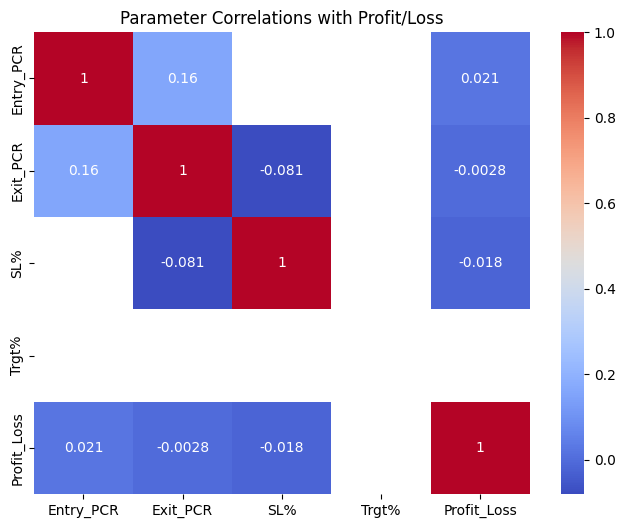

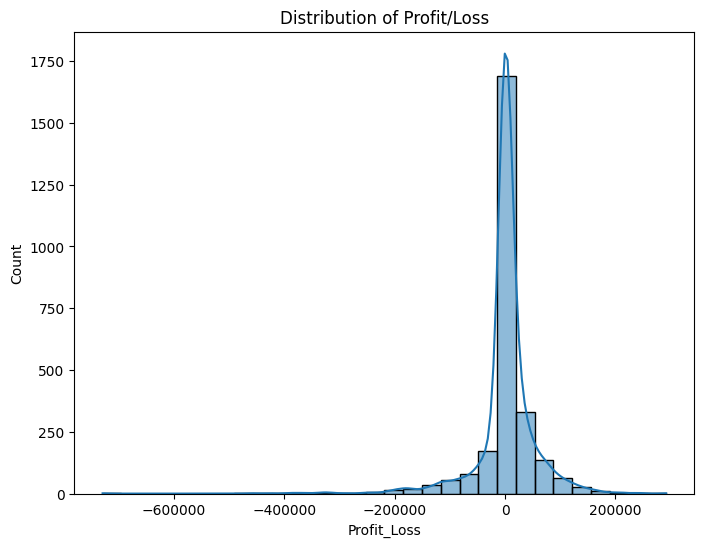

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import PatternFill
from openpyxl.drawing.image import Image

# Load the dataset
df = pd.read_csv('/content/trading_data.csv')

# Process data
df['Date'] = pd.to_datetime(df['Date'])
df['Direction'] = df['Direction'].map({'Buy': 1, 'Sell': -1})
df['Profit_Loss'] = (df['Exit_Price'] - df['Entry_Price']) * df['Quantity'] * df['Direction']

# Calculate key metrics
summary_data = {
    "Metric": ["Average Entry PCR", "Average Exit PCR", "Average SL%", "Average Target%", "Total Profit/Loss"],
    "Value": [
        df['Entry_PCR'].mean(),
        df['Exit_PCR'].mean(),
        df['SL%'].mean(),
        df['Trgt%'].mean(),
        df['Profit_Loss'].sum()
    ]
}
summary_df = pd.DataFrame(summary_data)

# Create a correlation heatmap figure
correlations = df[['Entry_PCR', 'Exit_PCR', 'SL%', 'Trgt%', 'Profit_Loss']].corr()
heatmap_fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', ax=ax)
plt.title('Parameter Correlations with Profit/Loss')
heatmap_fig.savefig('/content/correlation_heatmap.png')

# Create a P&L distribution histogram figure
hist_fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['Profit_Loss'], kde=True, bins=30, ax=ax)
plt.title('Distribution of Profit/Loss')
hist_fig.savefig('/content/pnl_distribution.png')

# Create Excel file
wb = Workbook()

# Sheet 1: Summary
summary_ws = wb.active
summary_ws.title = "Summary"
for row in dataframe_to_rows(summary_df, index=False, header=True):
    summary_ws.append(row)
summary_ws["B1"].fill = PatternFill(start_color="FFFF00", end_color="FFFF00", fill_type="solid")
summary_ws["B2"].fill = PatternFill(start_color="FFFF00", end_color="FFFF00", fill_type="solid")

# Sheet 2: Raw Data
raw_data_ws = wb.create_sheet("Raw Data")
for row in dataframe_to_rows(df, index=False, header=True):
    raw_data_ws.append(row)

# Sheet 3: Analysis
analysis_ws = wb.create_sheet("Analysis")
analysis_ws.append(["Key Observations"])
analysis_ws.append(["Total Trades", len(df)])
analysis_ws.append(["Winning Trades", len(df[df['Profit_Loss'] > 0])])
analysis_ws.append(["Losing Trades", len(df[df['Profit_Loss'] <= 0])])
analysis_ws.append(["Win Rate", len(df[df['Profit_Loss'] > 0]) / len(df) * 100])
analysis_ws.append(["Loss Rate", len(df[df['Profit_Loss'] <= 0]) / len(df) * 100])

# Sheet 4: Charts
charts_ws = wb.create_sheet("Charts")
charts_ws.append(["P&L Distribution Chart"])
pnl_image = Image('/content/pnl_distribution.png')
charts_ws.add_image(pnl_image, 'B2')

charts_ws.append(["Correlation Heatmap"])
heatmap_image = Image('/content/correlation_heatmap.png')
charts_ws.add_image(heatmap_image, 'B20')

# Save Excel file
excel_path = "/content/Trading_Analysis.xlsx"
wb.save(excel_path)

print(f"Excel file saved at: {excel_path}")
